In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u

from pathlib import Path
PATH = Path('../..').resolve()

seed = 256

# Cross-validation

In [58]:
cv = pd.read_csv(PATH/'results/desi-sv/FL-hdxresnet34-sz144.csv', index_col='OBJID')
cv

,RA,DEC,r_mag,HOSTID,SPEC_Z,SATS,SPEC_REPEAT,sb_r,sb_r_err,g_mag,...,ri,ri_err,rz,rz_err,p_sat_approx,saga_sel,low_z,SPEC_FLAG,kfold_split,pred_low_z
OBJID,,,,,,,,,,,,,,,,,,,,,
902644590000002111,341.477689,-11.838128,19.294525,b'pgc69677',0.195853,0,b'AAT',24.521122,0.010064,19.854319,...,-79.705475,99.0,0.330612,0.015220,1.247385e-02,2,False,1,True,0.038275
903002960000004917,35.759089,-5.255209,20.549173,b'nsa155005',0.329709,0,b'SDSS',22.244095,0.015394,21.559282,...,-78.450830,99.0,0.649958,0.011494,2.976960e-06,0,False,1,True,0.028425
902122150000002093,52.742358,-21.024058,20.156954,b'pgc13108',0.196542,0,b'AAT',23.329569,0.015978,20.773516,...,-78.843050,99.0,0.347189,0.019488,2.867484e-04,1,False,1,True,0.027418
902873000000001443,8.616432,-7.487072,14.917099,b'nsa127226',0.026742,0,b'6dF+NSA',19.589106,0.000517,15.657568,...,-84.082900,99.0,0.551365,0.000385,1.448676e-02,2,True,1,True,0.394934
903348450000005952,39.426349,0.642888,16.163795,b'nsa132368',0.126094,0,b'SDSS+NSA',20.758510,0.001222,17.120739,...,-82.836205,99.0,0.633676,0.000784,2.287172e-03,0,False,1,True,0.012577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900328720000004138,7.095291,-64.127687,15.160477,b'pgc1952',0.075145,0,b'SGA+6dF',23.221533,0.000444,15.886150,...,-83.839520,99.0,0.534874,0.000672,4.047538e-01,2,False,1,True,0.090195
903361050000004353,354.369337,0.705382,17.439257,b'nsa61945',0.084612,0,b'SDSS+AAT+NSA',20.592894,0.001569,18.172932,...,-81.560745,99.0,0.488821,0.001563,5.010928e-04,1,False,1,True,0.105613
904461180000004520,1.318486,20.534346,18.269993,b'nsa126115',0.110193,0,b'MMT',20.407877,0.004818,18.917526,...,-80.730010,99.0,0.528872,0.003692,1.195960e-04,1,False,1,True,0.186700


In [59]:
cv.columns

Index(['RA', 'DEC', 'r_mag', 'HOSTID', 'SPEC_Z', 'SATS', 'SPEC_REPEAT', 'sb_r',
       'sb_r_err', 'g_mag', 'i_mag', 'z_mag', 'gr', 'gr_err', 'ri', 'ri_err',
       'rz', 'rz_err', 'p_sat_approx', 'saga_sel', 'low_z', 'SPEC_FLAG',
       'kfold_split', 'pred_low_z'],
      dtype='object')

## Redder

(-0.5, 2.5)

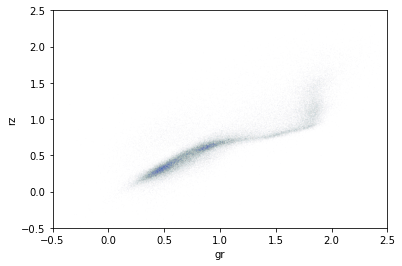

In [75]:
cv.plot.scatter('gr', 'rz', s=1, alpha=0.01, edgecolors='none')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

In [92]:
redder = (cv.gr > 0.6) & (cv.gr < 1) & (cv.r_mag > 18) & (cv.pred_low_z > 0.5)
cv[redder].sort_values('pred_low_z', ascending=False)[['RA', 'DEC', 'r_mag', 'gr', 'pred_low_z', 'SPEC_Z', 'sb_r']]

,RA,DEC,r_mag,gr,pred_low_z,SPEC_Z,sb_r
OBJID,,,,,,,
903411720000004515,181.186011,1.712495,18.491848,0.677593,0.747434,0.020870,23.705479
903426120000006411,181.246892,1.987158,18.163116,0.649494,0.740982,0.019432,23.840757
903411700000003715,180.660342,1.831496,18.148182,0.647819,0.737256,0.018140,24.141567
903426120000005733,181.214183,2.005475,18.737425,0.692528,0.699795,0.020731,22.300442
903411720000001392,181.054606,1.690949,18.204624,0.657677,0.694804,0.021160,23.295544
903440510000002766,180.862629,2.191491,18.231972,0.647816,0.691756,0.020188,22.102781
903426110000003581,180.886343,1.992637,18.393220,0.656790,0.690650,0.021364,23.724794
903109510000004450,185.170194,-3.533713,18.997837,0.965254,0.689716,0.011061,25.564825
915941780000000967,138.985214,52.787260,18.315560,0.662060,0.682215,0.025600,23.477520


## Low- surface brightness

In [97]:
lsb = (cv.sb_r > 25) & (cv.sb_r_err < 1) & (cv.r_mag > 18) & (cv.pred_low_z > 0.5)
cv[lsb].sort_values('pred_low_z', ascending=False)[['RA', 'DEC', 'r_mag', 'gr', 'pred_low_z', 'SPEC_Z', 'sb_r']]

,RA,DEC,r_mag,gr,pred_low_z,SPEC_Z,sb_r
OBJID,,,,,,,
901530310000007270,31.892903,-32.404309,20.354820,0.040503,0.869555,0.014500,25.909450
915501890000003127,207.581893,41.377351,20.151676,-0.416910,0.844806,0.008409,27.067871
904913870000004757,209.373182,29.059057,18.542822,0.249731,0.710402,0.007418,25.005276
904223450000002948,233.644803,16.008385,18.493252,0.263077,0.691830,0.013980,25.169596
903109510000004450,185.170194,-3.533713,18.997837,0.965254,0.689716,0.011061,25.564825
902520860000006562,53.655679,-13.796298,19.210035,0.381500,0.685438,0.007490,25.314476
901039880000006900,330.707934,-43.443828,18.040348,0.212053,0.654362,0.008384,25.740475
903513010000002238,194.142168,3.446181,18.196255,0.336252,0.604277,0.047537,25.163675
904474690000000572,1.369795,20.867211,20.088030,0.292479,0.599262,0.014346,25.186783


## Individual sources of interest

[903513860000004708](https://www.legacysurvey.org/viewer?ra=215.518256&dec=3.586519&zoom=14&layer=ls-dr9) The spec-z is around z=0.6 but it certainly looks like a low-z galaxy.

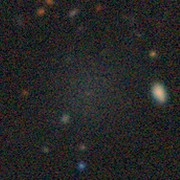

# Predictions

## Visual target selection comparison

In [4]:
df = pd.read_csv(PATH/'results/desi-sv/desi_field-for_visual_comparison.csv', index_col='OBJID')
df

,RA,DEC,r_mag,p_low_z_7_4,preds_hdxresnet34-sz144
OBJID,,,,,
904907760000003342,34.962115,29.041175,19.377851,0.531072,0.838791
925007830000002357,35.383956,31.045447,19.775100,0.698029,0.820062
905007790000003065,34.251439,30.936710,19.160679,0.693283,0.808023
925007830000002345,35.383258,31.046725,19.826603,0.691228,0.801233
904982970000004600,34.688029,30.501089,19.736895,0.702533,0.783898
...,...,...,...,...,...
904958010000004511,34.559648,30.010173,19.341135,0.287023,0.019886
905020170000005053,34.953395,31.225032,19.551064,0.288635,0.019197
904970530000002833,35.141403,30.280136,19.438812,0.289295,0.016434


In [19]:
df = df.rename({'preds_hdxresnet34-sz144': 'p_low_z_hdx34_sz144'}, axis=1)

In [20]:
df[['RA', 'DEC', 'r_mag', 'p_low_z_hdx34_sz144']].to_csv(PATH/'results/desi-sv/desi_sv_CNN.csv')

## Ensemble preds

In [100]:
df = pd.read_csv(PATH/'results/desi-sv/desi_p2_ensemble-preds.csv', index_col='OBJID')
df

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,preds_hdxresnet18-sz80,preds_hdxresnet18-sz144
OBJID,,,,,,,,
902918190000002396,66.223965,-6.656335,21.991380,0.289424,0.286970,0.050151,0.044306,0.037479
902918190000003670,66.277320,-6.678317,21.884491,0.289563,0.287684,0.051665,0.050654,0.044270
902918190000003699,66.278287,-6.657616,19.884615,0.289624,0.287852,0.015681,0.037232,0.038622
902918190000004561,66.317535,-6.652278,21.318390,0.287944,0.287613,0.045229,0.057770,0.051788
902918190000004863,66.331727,-6.681737,19.252178,0.291431,0.294845,0.043362,0.073826,0.063989
...,...,...,...,...,...,...,...,...
925044810000004552,35.127770,31.759936,17.003899,0.355924,0.295523,0.022843,0.281776,0.030184
925044810000004718,35.137617,31.650712,19.832476,0.291931,0.291589,0.039814,0.061116,0.048036
925044810000004762,35.140826,31.758542,19.564535,0.288966,0.292102,0.017427,0.054673,0.036211


In [113]:
df[[c for c in df.columns if c.startswith('p')]].corr()

,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,preds_hdxresnet18-sz80,preds_hdxresnet18-sz144
p_low_z_6_4,1.000000,0.803716,0.720905,0.887322,0.723184
p_low_z_7_4,0.803716,1.000000,0.615295,0.823650,0.608693
preds_hdxresnet34-sz144,0.720905,0.615295,1.000000,0.718705,0.943163
preds_hdxresnet18-sz80,0.887322,0.823650,0.718705,1.000000,0.709647
preds_hdxresnet18-sz144,0.723184,0.608693,0.943163,0.709647,1.000000


In [121]:
df[df.r_mag > 19].sort_values('preds_hdxresnet18-sz144', ascending=False)[:30]

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,preds_hdxresnet18-sz80,preds_hdxresnet18-sz144
OBJID,,,,,,,,
915869670000003446,120.468632,50.728234,19.398552,0.727826,0.721445,0.950546,0.973892,0.803420
903382830000002870,178.913343,1.237461,19.624945,0.664921,0.669827,0.834015,0.767390,0.800260
915869670000003567,120.477221,50.732623,19.020567,0.729347,0.721573,0.976241,0.980379,0.787952
903382830000002717,178.906087,1.228039,19.038612,0.712780,0.612330,0.864100,0.865117,0.771021
903382830000002816,178.910781,1.226424,19.810434,0.687834,0.429310,0.777463,0.835451,0.768144
902988610000000878,35.418941,-5.527916,20.399792,0.691680,0.703450,0.868829,0.808703,0.751228
903253280000002540,180.103252,-1.117342,19.427734,0.719514,0.700130,0.892426,0.879434,0.749718
902988610000000203,35.400975,-5.524542,20.469767,0.728789,0.709416,0.947437,0.935936,0.742640
903253280000002150,180.088287,-1.113281,19.116148,0.724563,0.701112,0.923382,0.883374,0.739823


# Cross match with ALFALFA 100%

In [2]:
desi = pd.read_csv(PATH/'results/desi-sv/desi_p2_preds.csv', index_col='OBJID')
desi.sample(5)

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144
OBJID,,,,,,
904478930000001435,114.636470,20.839121,21.229370,0.289457,0.288349,0.028648
905061220000000430,156.492360,32.067776,21.512587,0.289225,0.285318,0.017862
902946850000002707,66.729926,-6.212818,17.914715,0.289170,0.293480,0.020134
916314160000003060,146.720139,65.276259,21.783870,0.291847,0.288150,0.108757
915878790000003675,120.238845,50.966326,20.849686,0.288926,0.292590,0.069117


In [3]:
a100 = pd.read_csv('/home/john/projects/HI-convnets/data/a100.code12.tab1.180315.csv')
a100.sample(5)


,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
21222,231975,161-138.,206.20251,27.12750,206.18709,27.13722,10932,190,22,247,1.49,0.08,12.1,1.99,159.5,2.3,9.95,0.05,1
28898,320438,496-018.,343.74457,31.80055,343.74582,31.80389,7186,107,10,439,1.26,0.06,12.9,2.10,97.9,2.3,9.45,0.05,1
28704,320372,453-009.,341.92084,18.76444,341.92667,18.75833,9718,255,30,276,1.69,0.09,10.1,2.33,133.7,2.3,9.85,0.05,1
2616,111929,........,21.16375,15.72472,21.16000,15.72889,2282,98,7,108,0.61,0.05,6.3,2.17,30.9,2.4,8.14,0.09,1
22156,8995,074-083.,211.19917,8.79778,211.19708,8.80056,1235,160,2,138,11.43,0.06,98.8,2.04,21.9,4.6,9.11,0.19,1


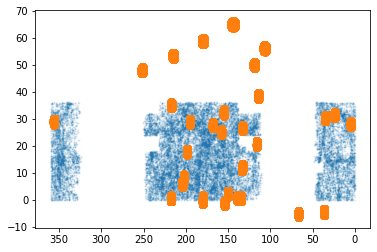

In [4]:
plt.scatter(a100.RAdeg_HI, a100.DECdeg_HI, alpha=0.1, s=1)
plt.scatter(desi.RA, desi.DEC)

plt.xlim(*reversed(plt.xlim()));

## xmatch to HI coordinate

In [ ]:
coord_desi = SkyCoord(desi.RA, desi.DEC, unit=u.deg)


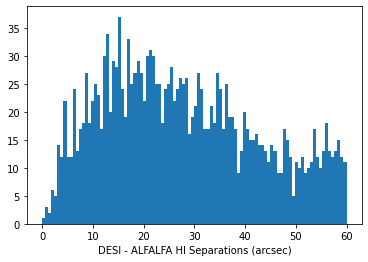

In [38]:
coord_a100_HI = SkyCoord(a100.RAdeg_HI, a100.DECdeg_HI, unit=u.deg)
idx_a100_HI, sep2d_HI, _ = coord_desi.match_to_catalog_sky(coord_a100_HI)

plt.hist(sep2d_HI.to(u.arcsec).value, bins=100, range=[0, 60]);
plt.xlabel('DESI - ALFALFA HI Separations (arcsec)');
plt.show()

# add crossmatches (separations and AGC numbers) to `desi`
desi['sep_HI'] = sep2d_HI.to(u.arcsec).value
desi['AGCNr_HI'] = a100.iloc[idx_a100_HI]['AGCNr'].values


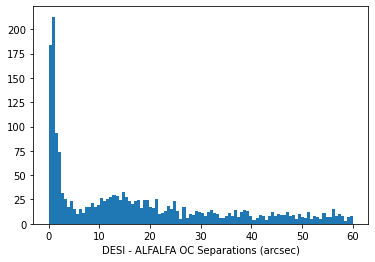

In [39]:
coord_a100_OC = SkyCoord(a100.RAdeg_OC, a100.DECdeg_OC, unit=u.deg)
idx_a100_OC, sep2d_OC, _ = coord_desi.match_to_catalog_sky(coord_a100_OC)

plt.hist(sep2d_OC.to(u.arcsec).value, bins=100, range=[0, 60]);
plt.xlabel('DESI - ALFALFA OC Separations (arcsec)');
plt.show()

# add OC crossmatches
desi['sep_OC'] = sep2d_OC.to(u.arcsec).value
desi['AGCNr_OC'] = a100.iloc[idx_a100_OC]['AGCNr'].values

In [41]:
# close and faint OPTICAL matches
crit = (desi.sep_OC < 3*u.arcsec) & (desi.r_mag > 19)

desi[crit].sort_values('preds_hdxresnet34-sz144', ascending=False)

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,sep_HI,AGCNr_HI,sep_OC,AGCNr_OC
OBJID,,,,,,,,,,
903354120000001228,181.052011,0.803009,20.995861,0.692531,0.687365,0.840973,31.350794,223256,1.849374,223256
904810490000003186,166.738487,26.908709,19.070800,0.657657,0.699038,0.718878,14.139157,749189,1.444710,749189
904938540000003357,195.079207,29.551198,19.962360,0.628566,0.686899,0.605090,26.236742,239030,1.590564,239030
904900780000002273,196.092971,28.763460,19.315302,0.556029,0.651262,0.561520,24.863347,234238,2.955794,234238
904919040000000080,356.583061,29.111882,19.209965,0.443115,0.632548,0.558176,34.631830,333567,1.163141,333567
904970560000001396,35.905579,30.238136,19.606766,0.584133,0.586638,0.551037,15.858834,122995,1.045598,122995
903369990000001013,217.797142,0.952053,19.889444,0.541309,0.714957,0.540158,14.081384,249428,1.782951,249428
905020210000000766,35.925305,31.243320,20.758453,0.442465,0.416208,0.507889,24.103955,122996,2.957756,122996
903671400000001890,205.206322,6.282500,20.810080,0.475110,0.332194,0.415720,27.916946,230543,1.996828,230543


In [42]:
# close and faint HI matches
crit = (desi.sep_HI < 3*u.arcsec) & (desi.r_mag > 19)

desi[crit].sort_values('preds_hdxresnet34-sz144', ascending=False)

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,sep_HI,AGCNr_HI,sep_OC,AGCNr_OC
OBJID,,,,,,,,,,
904868360000004095,355.721731,28.025694,20.227522,0.480095,0.516262,0.722736,2.867469,332952,3.518970,332952
925044810000004285,35.111794,31.675746,19.339420,0.656560,0.704025,0.702397,2.274945,120172,33.965204,120172
904023990000004066,134.471581,12.497494,19.891410,0.593496,0.668483,0.651358,2.638840,4694,12.368392,4694
903381680000004265,150.198605,1.242727,20.203380,0.417387,0.683621,0.579049,2.042635,191427,20.451746,191427
904893770000001543,356.418181,28.537313,19.038786,0.425598,0.581729,0.503361,2.510338,333565,14.252916,333565
904640720000003062,157.767042,23.751679,20.262285,0.443068,0.650703,0.427631,1.477460,718911,16.632841,718911
905019830000004048,24.996826,31.238834,20.343810,0.368845,0.331130,0.150954,1.878116,110466,25.011029,110466


In [47]:
# no nearby OC (>6arcsec) but only HI (<6 arcsec)
crit = (desi.sep_HI < 6*u.arcsec) & (desi.sep_OC > 6*u.arcsec) & (desi.r_mag > 19)
desi[crit].sort_values('preds_hdxresnet34-sz144', ascending=False)

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,sep_HI,AGCNr_HI,sep_OC,AGCNr_OC
OBJID,,,,,,,,,,
903614010000002451,204.433453,5.248868,19.614763,0.697284,0.714843,0.845019,3.098589,8617,26.837934,8617
904023880000001498,131.501214,12.613102,19.816301,0.711862,0.659528,0.830751,4.088365,4584,26.488511,4584
925007830000002345,35.383258,31.046725,19.826603,0.673092,0.691228,0.801233,3.177651,1815,18.973294,1815
904830360000003562,4.109986,27.570167,20.331236,0.662577,0.676514,0.709190,5.752294,100124,11.554640,100124
904277430000000904,199.891746,16.987908,19.011023,0.624866,0.685289,0.705931,4.633063,8370,10.448464,8370
925044810000004285,35.111794,31.675746,19.339420,0.656560,0.704025,0.702397,2.274945,120172,33.965204,120172
904023990000004066,134.471581,12.497494,19.891410,0.593496,0.668483,0.651358,2.638840,4694,12.368392,4694
904291120000000426,197.522853,17.182895,21.876080,0.583264,0.687045,0.650954,5.563779,239059,12.892412,239059
903599610000003648,203.488742,5.096435,20.288662,0.648733,0.672376,0.625467,5.946670,231403,16.969477,231403


In [57]:
# no nearby OC (>10arcsec) but only HI (<10 arcsec)
crit = (desi.sep_OC > 10*u.arcsec) & (desi.sep_HI < 10*u.arcsec) & (desi.r_mag > 19)
desi[crit].sort_values('preds_hdxresnet34-sz144', ascending=False)

,RA,DEC,r_mag,p_low_z_6_4,p_low_z_7_4,preds_hdxresnet34-sz144,sep_HI,AGCNr_HI,sep_OC,AGCNr_OC
OBJID,,,,,,,,,,
903614010000002451,204.433453,5.248868,19.614763,0.697284,0.714843,0.845019,3.098589,8617,26.837934,8617
904023880000001498,131.501214,12.613102,19.816301,0.711862,0.659528,0.830751,4.088365,4584,26.488511,4584
904732490000000791,156.820928,25.515513,20.344559,0.711839,0.702418,0.828535,8.231579,202047,20.596997,202047
925007830000002357,35.383956,31.045447,19.775100,0.654930,0.698029,0.820062,7.416712,1815,13.974587,1815
904899790000000891,167.801812,28.761122,19.349966,0.573107,0.675203,0.802605,9.644943,216492,19.436374,216492
925007830000002345,35.383258,31.046725,19.826603,0.673092,0.691228,0.801233,3.177651,1815,18.973294,1815
904944180000003026,356.748220,29.468584,19.281723,0.359231,0.467488,0.764760,9.041886,12779,38.127697,12779
903410460000002408,149.621240,1.697273,19.429213,0.631719,0.687856,0.756900,6.279175,191796,10.304922,191796
904023990000004015,134.469087,12.497953,19.974890,0.552782,0.608993,0.711736,6.339824,4694,10.635624,4694
